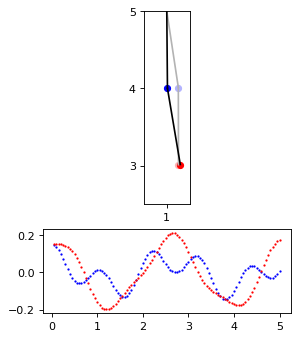

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from IPython import display

# Function to get acceleration of the pendulums, based off of Lagrangian Mechanics. The variable 'alpha1' refers to the 
# angular acceleration of the angle phi between the vertical and the first pendulum's string, while the 'alpha2' variable refers to the 
# angular acceleration of the angle phi between the vertical and the second pendulum's string.

def acc(m1,m2,L1,L2,g,phi1,phi2):
    alpha1 = -1*(g*(m1 + m2)*phi1 - g*m2*phi2)/(L1*m1);
    alpha2 = -1*(-g*(m1 + m2)*phi1 + g*(m1 + m2)*phi2)/(L2*m1);
    
    return alpha1, alpha2;

def main():
    
    # defining necessary variables for the simulation. 
    t = 0;
    tf = 5;
    dt = 0.05;
    N = int(np.ceil(tf/dt));
    plotRealTime = True;
    
    
    # defining the physical variables.
    x1i = 1;
    x2i = x1i;
    
    phi1 = random.random()*math.pi/16;
    phi2 = random.random()*math.pi/16;
    
    x1 = math.sin(phi1);
    x2 = x1 + math.sin(phi2);
    
    x1t = x1 + x1i;
    x2t = x2 + x2i;
    x1s = x1t;
    x2s = x2t;
    
    y1 = 5 - math.cos(phi1);
    y2 = y1 - math.cos(phi2);
    y1s = y1;
    y2s = y2;
    
    g = 9.8;
    m1 = 5;
    m2 = 5;
    L1 = 1;
    L2 = 1;
    
    # objects are released at rest.
    vlx1 = 0;
    vlx2 = 0;
    vly1 = 0;
    vly2 = 0;
    omega1 = 0;
    omega2 = 0;
    
    acl = acc(m1,m2,L1,L2,g,phi1,phi2);
    alpha1 = acl[0];
    alpha2 = acl[1];
    
    # creating the plots and turning interactive plotting on to animate our results.
    plt.ion();
    fig = plt.figure(figsize=(4,5), dpi=80);
    grid = plt.GridSpec(3, 1, wspace=0.0, hspace=0.3);
    ax1 = plt.subplot(grid[0:2,0]);
    ax2 = plt.subplot(grid[2,0]);
    
    for i in range(N):
        
        # updating 'phi1' and 'phi2' based on the acceleration function created above and using the leapfrog integration 
        # technique.
        phi1 += omega1*dt + 0.5*alpha1*dt**2;
        omega1 += alpha1*dt/2.0;
        phi2 += omega2*dt + 0.5*alpha2*dt**2;
        omega2 += alpha2*dt/2.0;
        
        acl = acc(m1,m2,L1,L2,g,phi1,phi2);
        alpha1 = acl[0];
        alpha2 = acl[1];
        omega1 += alpha1*dt/2.0;
        omega2 += alpha2*dt/2.0;
        t += dt;
        
        x1 = math.sin(phi1);
        x2 = x1 + math.sin(phi2);
        x1t = x1i + x1;
        x2t = x2i + x2;
        
        y1 = 5 - math.cos(phi1);
        y2 = y1 - math.cos(phi2);
        
        if plotRealTime or (i == N-1):
            
            # clear graphs for every iteration and plot the positions of the pendulums (with the strings drawn)
            # the position is plotted as 'y' vs. 'x'.
            plt.sca(ax1);
            plt.cla();
            
            px1s = [1,x1s];
            px2s = [x1s,x2s];
            py1s = [5,y1s];
            py2s = [y1s,y2s];
            
            plt.plot(px1s, py1s, color = [0.7,0.7,0.7]);
            plt.plot(px2s, py2s, color = [0.7,0.7,0.7]);
            
            plt.scatter(x1s,y1s,s=30,color=[0.7,0.7,1]);
            plt.scatter(x2s,y2s,s=30,color=[1,0.7,0.7]);
            plt.scatter(x1t,y1,s=30,color='blue');
            plt.scatter(x2t,y2,s=30,color='red');
            
            px1 = [x1i,x1t];
            px2 = [x1t,x2t];
            py1 = [5,y1];
            py2 = [y1,y2];
            
            plt.plot(px1, py1, color = 'black');
            plt.plot(px2, py2, color = 'black');
            
            ax1.set(xlim=(0.7, 1.3), ylim=(2.5, 5));
            ax1.set_aspect('equal', 'box');
            ax1.set_xticks([1]);
            ax1.set_yticks([3,4,5]);
            
            # graph the second plot with the position 'x' with respect to time.
            plt.sca(ax2);
            plt.scatter(t,x1,color='blue',s=1);
            plt.scatter(t,x2,color='red',s=1);
            
            # the part of the code that animates results rather than plotting a graph for each iteration of the 'for' loop.
            display.display(plt.gcf());
            display.clear_output(wait=True);
            fig.canvas.draw();
            fig.canvas.flush_events();
    return 0;

if __name__== "__main__":
    main()